In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)

    accuracy = accuracy_score(y_test, pred)

    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):

    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("../../../data/santander-customer-satisfaction/train.csv", encoding='latin-1')
predict_df = pd.read_csv("../../../data/santander-customer-satisfaction/test.csv", encoding='latin-1')
santander_submission_df = pd.read_csv("../../../data/santander-customer-satisfaction/sample_submission.csv", encoding='latin-1')

cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [59]:
print(cust_df['TARGET'].value_counts())

total_cnt = cust_df.TARGET.count()
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt * 100)))

print('santander customer satisfaction: 데이터 세트 Null 값 갯수 ',cust_df.isnull().sum().sum())

cust_df.drop('ID', axis=1, inplace=True) # 필요 없는 행 삭제
cust_df['var3'].value_counts() # 이상치 탐색

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 3.96
santander customer satisfaction: 데이터 세트 Null 값 갯수  0


var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: count, Length: 208, dtype: int64

## 이상치
> - ### 대체 (Imputation)
>   - 가장 일반적인 값으로 대체: var3에서 가장 빈번하게 나타나는 값으로 -999999를 대체합니다. 이 방법은 데이터의 분포를 크게 왜곡하지 않는다.
>   - 평균 또는 중앙값으로 대체: 데이터의 평균값이나 중앙값으로 -999999를 대체한다.
>   - 고유한 값으로 대체: 특정 고유 값(예: 0)으로 대체하여 모델이 이를 인식할 수 있도록 한다.

> - ### 제거 (Deletion)
>   - 행 제거: -999999 값을 가진 행을 데이터셋에서 제거합니다. 이 방법은 데이터의 손실을 초래할 수 있습니다.
>   - 열 제거: var3 자체가 중요하지 않다면 전체 열을 제거할 수도 있습니다.

> - ### 이외
> - #### KNN Imputation: K-최근접 이웃 알고리즘을 사용하여 결측값을 대체
> - #### 모델 기반 대체: 다른 변수들을 사용하여 -999999 값을 예측하고 대체


## 이상치 처리 방법 = 다음과 같은 요소들을 고려
> - 데이터의 크기와 분포: 데이터셋이 큰 경우, 일부 데이터를 제거해도 큰 문제가 되지 않을 수 있다.
> - 이상치의 빈도: 이상치가 많은 경우, 특정 값을 대체하는 것이 더 적절할 수 있다.
> - 모델의 민감성: 특정 모델이 이상치나 결측값에 민감한 경우, 보다 정교한 대체 방법이 필요할 수 있다.

![nn](./1.png)
![nn](./2.png)
![nn](./3.png)
![nn](./4.png)

In [60]:
# # var3 피처 값 대체(2가 많으니 2로 대체) 및 ID 피처 드롭 -> 고민이 필요함
# most_frequent_value = cust_df['var3'].value_counts().idxmax()
# cust_df['var3'].replace(-999999, most_frequent_value, inplace=True)

# # 평균값 계산 (이 경우 -999999 값을 제외하고 계산)
# mean_value = cust_df[cust_df['var3'] != -999999]['var3'].mean()
# cust_df['var3'].replace(-999999, mean_value, inplace=True)

# # 중앙값 계산 (이 경우 -999999 값을 제외하고 계산)
# median_value = cust_df[cust_df['var3'] != -999999]['var3'].median()
# cust_df['var3'].replace(-999999, median_value, inplace=True)

# # -999999 값을 고유한 값 (예: 0)으로 대체
# cust_df['var3'].replace(-999999, 0, inplace=True)

# -999999 값을 가진 행 제거
cust_df = cust_df[cust_df['var3'] != -999999]

In [46]:
# KNN Imputation: K-최근접 이웃 알고리즘을 사용하여 결측값을 대체
# 결측값을 K-최근접 이웃의 평균값으로 대체하며, 모델 기반 대체는 다른 변수들을 사용하여 결측값을 예측

from sklearn.impute import KNNImputer

# -999999 값을 NaN으로 대체
cust_df['var3'].replace(-999999, np.nan, inplace=True)

# KNN Imputer 생성 및 적용
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(cust_df)

# 결과를 데이터프레임으로 변환
cust_df = pd.DataFrame(df_imputed, columns=cust_df.columns)

cust_df['var3'].value_counts() # 이상치 탐색

var3
2.0      74279
8.0        138
9.0        110
3.0        108
1.0        106
         ...  
231.0        1
188.0        1
168.0        1
135.0        1
87.0         1
Name: count, Length: 207, dtype: int64

In [61]:
# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X = cust_df.iloc[:, :-1]
y = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X.shape))
print('피처 데이터 shape:{0}'.format(y.shape))
print('santander customer satisfaction: 데이터 세트 Null 값 갯수 ', X.isnull().sum().sum())

# 표준화 => 2차원 데이터
sc = StandardScaler()
X = sc.fit_transform(X)
print('피처 데이터 shape:{0}'.format(X.shape))

# predict_df에서의 ID 드롭
predict_df.drop('ID', axis=1, inplace=True)
predict_df = sc.transform(predict_df)
print('피처 데이터 shape:{0}'.format(predict_df.shape))

피처 데이터 shape:(75904, 369)
피처 데이터 shape:(75904,)
santander customer satisfaction: 데이터 세트 Null 값 갯수  0
피처 데이터 shape:(75904, 369)
피처 데이터 shape:(75818, 369)


In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE()
X_1, y_1 = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt * 100)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt * 100, '\n')

학습 세트 Shape:(116819, 369), 테스트 세트 Shape:(29205, 369) 

학습 세트 레이블 값 분포 비율
TARGET
0    50.143384
1    49.856616
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
1    50.573532
0    49.426468
Name: count, dtype: float64 



In [4]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

adasyn = ADASYN()
X_2, y_2 = adasyn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt * 100)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt * 100, '\n')

학습 세트 Shape:(117196, 369), 테스트 세트 Shape:(29300, 369) 

학습 세트 레이블 값 분포 비율
TARGET
1    50.016212
0    49.983788
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
1    50.740614
0    49.259386
Name: count, dtype: float64 



In [62]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_3, y_3 = smoteto.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt * 100)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt * 100, '\n')

학습 세트 Shape:(117196, 369), 테스트 세트 Shape:(29300, 369) 

학습 세트 레이블 값 분포 비율
TARGET
1    50.016212
0    49.983788
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
1    50.740614
0    49.259386
Name: count, dtype: float64 



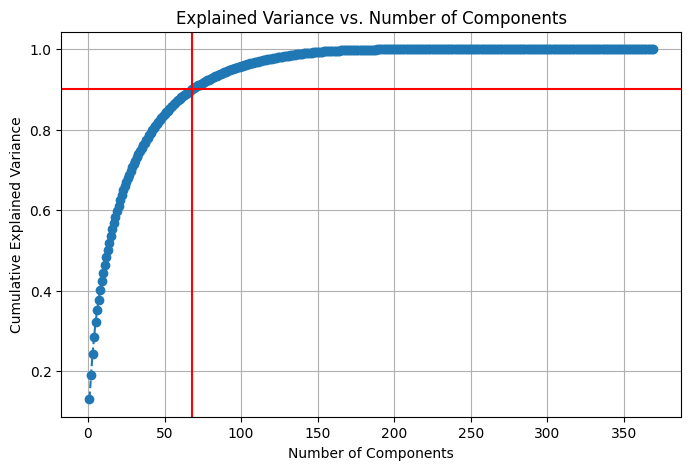

Optimal number of components for 90% variance: 68


In [63]:
from sklearn.decomposition import PCA

# PCA를 실행하여 설명된 분산 비율을 구하기
pca = PCA()
pca1 = pca.fit(X_3)
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 설명된 분산 비율을 구하기
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 누적 설명된 분산 비율이 90% 이상이 되는 지점을 찾기
threshold = 0.90
optimal_n_components = np.argmax(cumulative_explained_variance >= threshold) + 1

# 설명된 분산 비율을 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='-')
plt.axvline(x=optimal_n_components, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

print(f"Optimal number of components for 90% variance: {optimal_n_components}")

# 설명된 분산 비율이 90% 또는 95% 이상을 차지하는 지점에서의 n_components 값을 선택할 수 있다.
# 일반적으로 누적 설명된 분산 비율이 90% 이상이 되는 지점을 선택하는 것이 좋다.
# 설명된 분산 비율이 급격히 증가하다가 점차 완만해지는 "엘보(elbow)" 지점을 찾는 것이 중요

In [64]:
pca = PCA(n_components=optimal_n_components)
pca_test = pca.fit_transform(X_3)
predict_df = pca.transform(predict_df)

X_train, X_test, y_train, y_test = train_test_split(pca_test, y_3, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape), '\n')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt * 100)

print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt * 100, '\n')

학습 세트 Shape:(114645, 68), 테스트 세트 Shape:(28662, 68) 

학습 세트 레이블 값 분포 비율
TARGET
1    50.862227
0    49.137773
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
1    50.893169
0    49.106831
Name: count, dtype: float64 



# LightBGM

In [65]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
print('학습 세트 Shape:{0}, 검증 세트 Shape:{1}'.format(X_tr.shape , X_val.shape))

학습 세트 Shape:(80251, 68), 검증 세트 Shape:(34394, 68)


In [66]:
from lightgbm import early_stopping
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, callbacks=[early_stopping(stopping_rounds=50)], eval_metric="logloss", eval_set=evals)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , preds, pred_proba)

[LightGBM] [Info] Number of positive: 40810, number of negative: 39441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17340
[LightGBM] [Info] Number of data points in the train set: 80251, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508529 -> initscore=0.034121
[LightGBM] [Info] Start training from score 0.034121
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[400]	training's binary_logloss: 0.318484	valid_1's binary_logloss: 0.344625
오차 행렬
[[11624  2451]
 [ 1551 13036]]
정확도: 0.8604, 정밀도: 0.8417, 재현율: 0.8937,    F1: 0.8669, AUC:0.9277


In [67]:
predict_santander_pred_svc = lgbm_wrapper.predict(predict_df)

santander_submission_df['TARGET'] = predict_santander_pred_svc
santander_submission_df.to_csv('santander_submission_pca_lgbm_wrapper.csv',index=False)
santander_submission_df

,ID,TARGET
0,2,1
1,5,1
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,1
75814,151832,0
75815,151833,0
75816,151834,1
